In [819]:
import json
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from numpy.linalg import matrix_rank

In [820]:
f = open("/Users/rohansanda/Desktop/math104_project/events/events_Spain.json")
g = open("/Users/rohansanda/Desktop/math104_project/teams.json")
h = open("/Users/rohansanda/Desktop/math104_project/eventid2name.csv")
k = open("/Users/rohansanda/Desktop/math104_project/players.json")
tags = pd.read_csv("/Users/rohansanda/Desktop/math104_project/tags2name.csv", header=0, index_col=["Tag"])
# i = open("/Users/rohansanda/Desktop/math104_project/tags2name.csv")

spain_data = json.load(f)
all_teams = json.load(g)
eventid2name = csv.reader(h)
all_players = json.load(k)

In [823]:
#Print out tags table
#tags

In [824]:
#Create translation dictionary from tag-id to description 
conv_tags = tags.to_dict("index")
#conv_tags[101]["Description"]

In [825]:
#Create translation dictionary from player-id to player object
all_players_ids = {}

for player in all_players:
    all_players_ids[player["wyId"]] = player

#len(all_players_ids)
     

In [826]:
#Filter for Spanish Teams in La Liga

#spain_teams[name] = info about that team
spain_teams = {}

#conv_id_to_name[team id] = name of team
conv_id_to_name = {}

#conv_name_to_id[name] = team id
conv_name_to_id = {}

for team in all_teams:
    area = team["area"]
    if area["name"] == "Spain":
        spain_teams[team["name"]] = team
        conv_id_to_name[team["wyId"]] = team["name"]
        conv_name_to_id[team["name"]] = team["wyId"]

#(spain_teams)

In [827]:
#test
#spain_teams["Real Madrid"]

In [828]:
#Print the number of match events per team
team_track = {}
for value in spain_data:
    team_name = conv_id_to_name[value["teamId"]]
    team_track[team_name] = team_track.get(team_name, 0) + 1

team_track

{'Villarreal': 32356,
 'Levante': 28100,
 'Real Sociedad': 33849,
 'Celta de Vigo': 33606,
 'Getafe': 26997,
 'Athletic Club': 30546,
 'Girona': 29182,
 'Atl\\u00e9tico Madrid': 31822,
 'Espanyol': 30032,
 'Sevilla': 33606,
 'Eibar': 32162,
 'M\\u00e1laga': 29282,
 'Barcelona': 36790,
 'Real Betis': 33793,
 'Real Madrid': 36005,
 'Deportivo La Coru\\u00f1a': 30317,
 'Valencia': 30788,
 'Las Palmas': 33196,
 'Deportivo Alav\\u00e9s': 27878,
 'Legan\\u00e9s': 28352}

In [829]:
#Get all events corresponding to one team id

team_name = "Athletic Club"

team_events_list = []
for value in spain_data:        
    if value["teamId"] == conv_name_to_id[team_name]:
        team_events_list.append(value)

len(team_events_list)

30546

In [735]:
#test
len(team_events_list)
team_events_list[1]

{'eventId': 8,
 'subEventName': 'Launch',
 'tags': [{'id': 1802}],
 'playerId': 3595,
 'positions': [{'y': 56, 'x': 42}, {'y': 64, 'x': 68}],
 'matchId': 2565550,
 'eventName': 'Pass',
 'teamId': 678,
 'matchPeriod': '1H',
 'eventSec': 9.551273000000009,
 'subEventId': 84,
 'id': 180434193}

In [831]:
#Get all players on the team and their id's. Construct player to id mapping
players = set()


for event in team_events_list:
     if event["playerId"] != 0:
         players.add(event["playerId"])
        
for player in players:
    print(player, all_players_ids[player]["lastName"])

len(players)

344065 L\u00f3pez Saratxo
344068 N\u00fa\u00f1ez Gestoso
3595 Etxebarria Urkiaga
344075 C\u00f3rdoba Kerejeta
4113 Etxeita Gorritxategi
3750 Balenziaga Oruesagasti
5290 Rico Moreno
3503 Garc\u00eda Escudero
3397 Arrizabalaga Revuelta
230857 \u00c1lvarez L\u00f3pez
167117 Aketxe Barrutia
230862 Lekue Mart\u00ednez
167119 Merino Zuloaga
3408 Saborit Teixidor
3409 San Jos\u00e9 Dom\u00ednguez
3414 Iturraspe Derteano
3671 Mart\u00ednez Berridi
3290 Aduriz Zubeldia
3420 Susaeta Laskurain
3421 de Marcos Arana
3425 Muniain Go\u00f1i
247141 Williams Arthuer
134502 Laporte
286963 Vesga Arruti
4086 B\u00f3veda Altube
4476 Herrer\u00edn Buis\u00e1n


26

In [832]:
#print(all_players_ids[256634])

In [834]:
#Go through the data and for any pass, determine to whom it was to. Record it if it was successful
teamId = conv_name_to_id[team_name]
pass_pair_events = []

for i in range(len(team_events_list)-1):
    curr_event = team_events_list[i]
    curr_player = curr_event["playerId"]
    if curr_event["teamId"] == teamId and curr_event["eventName"] == "Pass" and curr_player != 0:
        next_event = team_events_list[i+1]
        next_player = next_event["playerId"]
        if next_event["teamId"] == teamId and next_player != curr_player and next_player != 0:
#             pass_pair_events.append(curr_event)
            curr_tags = curr_event["tags"]
            pass_type = curr_event["subEventName"]
            #print(pass_type)
            pass_pair_events.append((curr_player, next_player, pass_type, curr_tags))


len(pass_pair_events)        

14023

In [836]:
all_pass_types = set()

for pair in pass_pair_events:
    _,_,ptype,_ = pair
    all_pass_types.add(ptype)

all_pass_types

{'Cross',
 'Hand pass',
 'Head pass',
 'High pass',
 'Launch',
 'Simple pass',
 'Smart pass'}

In [837]:
# print(pass_pair_events[3])
# print(pass_pair_events[9])

In [839]:
#create a dict of dicts for linking passes between players

pass_map = {}
pass_type_map = {}
pass_tag_map = {}
player_set = set()

for event in pass_pair_events:
    player1, player2, pass_type, tags = event
    player_set.add(player1)
    player_set.add(player2)
    pass_type_map[player1] = pass_type
    pass_tag_map[player1] = tags
    

len(player_set)

26

In [848]:
turn_on_ssp_model = 0 #0 mean off

#intialize counts to 0
for player_id in player_set:
    pass_map[player_id] = {}
    for inner_player_id in player_set:
        pass_map[player_id][inner_player_id] = 0
    
#count up passes
for i in range(len(pass_pair_events)):
    player1, player2, pass_type, tags = pass_pair_events[i]
    adder = 1
    
    if turn_on_ssp_model:
        for tag in tags:
            tname = conv_tags[tag["id"]]["Description"]
            if tname == "Key Pass":
                adder += 15
            elif tname == "Opportunity":
                adder += 10
            elif tname == "Through":
                adder += 5
            elif tname == "Assist":
                adder += 30

        if pass_type == "Cross":
            adder += 5
        elif pass_type == "Smart pass":
            adder += 15
    
    pass_map[player1][player2] += adder
        
            

In [850]:
#Number of pass "edges" or "weights" per player node
for player in pass_map:
    total=0
    for passed in pass_map[player]:
        total += pass_map[player][passed]
    print(player, total)
    
        


344065 26
344068 1319
3595 664
344075 448
4113 155
3750 561
5290 499
3503 677
3397 674
230857 395
167117 36
230862 889
167119 80
3408 495
3409 885
3414 1042
3671 658
3290 398
3420 791
3421 684
3425 402
247141 648
134502 886
286963 338
4086 194
4476 179


In [851]:
df_pass_mat = pd.DataFrame(pass_map)
df_pass_mat

,344065,344068,3595,344075,4113,3750,5290,3503,3397,230857,...,3671,3290,3420,3421,3425,247141,134502,286963,4086,4476
344065,0,2,2,0,0,0,2,2,0,0,...,9,0,3,0,0,1,0,0,0,3
344068,1,0,53,18,14,12,48,34,86,38,...,40,12,41,68,32,24,140,34,34,20
3595,3,74,0,22,4,12,14,17,9,42,...,35,23,30,45,41,42,23,9,3,1
344075,0,18,18,0,0,83,5,48,22,7,...,38,23,23,18,11,30,30,33,6,0
4113,0,7,8,2,0,4,8,3,4,5,...,6,2,12,13,1,6,5,5,0,3
3750,0,38,18,57,8,0,25,30,23,0,...,33,18,37,7,21,14,95,21,4,4
5290,1,48,15,4,9,17,0,13,6,13,...,18,17,50,20,6,23,42,5,3,9
3503,3,56,31,34,7,41,48,0,107,12,...,47,42,61,63,15,62,43,16,13,33
3397,0,126,19,13,11,19,4,11,0,35,...,89,5,5,25,3,2,89,6,8,0
230857,1,36,36,2,4,1,14,10,21,0,...,47,4,15,23,10,7,0,6,0,4


In [852]:
#all_players_ids[list(pass_map.keys())[2]]["lastName"]

In [853]:
np_adj_mat = pd.DataFrame(pass_map).to_numpy()
np_adj_mat = np.transpose(np_adj_mat)
np.sum(np_adj_mat)

14023

In [854]:
np_adj_mat_norm = np_adj_mat/np_adj_mat.sum(axis=0)
np_adj_mat_norm

array([[0.        , 0.00091408, 0.00487805, 0.        , 0.        ,
        0.        , 0.00224215, 0.00309278, 0.        , 0.0030303 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00231481, 0.01438849, 0.        , 0.00434311, 0.        ,
        0.        , 0.00108342, 0.        , 0.        , 0.        ,
        0.01369863],
       [0.06896552, 0.        , 0.1203252 , 0.03231598, 0.05785124,
        0.06713781, 0.10762332, 0.05773196, 0.22661871, 0.10909091,
        0.13513514, 0.13215859, 0.08247423, 0.05367793, 0.11889862,
        0.11342593, 0.07733813, 0.0570523 , 0.0640608 , 0.10872675,
        0.05813953, 0.06933911, 0.20505618, 0.125     , 0.17910448,
        0.25342466],
       [0.06896552, 0.04844607, 0.        , 0.03231598, 0.0661157 ,
        0.03180212, 0.03363229, 0.03195876, 0.03417266, 0.10909091,
        0.        , 0.05947137, 0.08247423, 0.03976143, 0.06633292,
        0.02314815, 0.08093525, 0.04437401, 0.04994571, 0.08297568,
      

In [855]:
def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    N = M.shape[1]
    store = np.ones((N, num_iterations))
    v = np.ones(N) / N
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
        store[:,i] = v
    return v

In [595]:
#output = pagerank(np_adj_mat_norm, 100, 0.85)

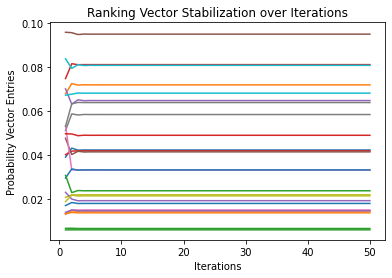

In [599]:
# t = np.arange(1, 51)

# for i in range(output.shape[0]):
#     iter = i
#     plt.plot(t, output[i, :])
    
# plt.title("Ranking Vector Stabilization over Iterations")
# plt.xlabel("Iterations")
# plt.ylabel("Probability Vector Entries")
# plt.show()

In [856]:
v = pagerank(np_adj_mat_norm, 100, 0.85)
v

array([0.00743837, 0.08983821, 0.04626408, 0.03182435, 0.01557947,
       0.03929824, 0.03601345, 0.04492162, 0.04452356, 0.02988697,
       0.00787108, 0.05952448, 0.01069077, 0.0368471 , 0.0587745 ,
       0.06942266, 0.04674589, 0.02858196, 0.0541457 , 0.0456594 ,
       0.02968957, 0.04448995, 0.06217359, 0.02598877, 0.01709042,
       0.01671585])

In [858]:
max_ind = v.argmax()
max(v)

#print the highest rank score

0.08983821042100422

In [859]:
score_mapping = {}
for i in range(len(v)):
    playerId = list(pass_map.keys())[i]
    #print(all_players_ids[list(pass_map.keys())[i]]["firstName"])
    name= all_players_ids[list(pass_map.keys())[i]]["lastName"]
    score_mapping[v[i]] = (name, v[i])

print(score_mapping)

{0.0074383706254704685: ('L\\u00f3pez Saratxo', 0.0074383706254704685), 0.08983821042100422: ('N\\u00fa\\u00f1ez Gestoso', 0.08983821042100422), 0.04626408391323993: ('Etxebarria Urkiaga', 0.04626408391323993), 0.03182435069965588: ('C\\u00f3rdoba Kerejeta', 0.03182435069965588), 0.015579468267063584: ('Etxeita Gorritxategi', 0.015579468267063584), 0.03929823883496807: ('Balenziaga Oruesagasti', 0.03929823883496807), 0.036013450276537046: ('Rico Moreno', 0.036013450276537046), 0.044921615067042675: ('Garc\\u00eda Escudero', 0.044921615067042675), 0.04452356305683287: ('Arrizabalaga Revuelta', 0.04452356305683287), 0.029886972586867344: ('\\u00c1lvarez L\\u00f3pez', 0.029886972586867344), 0.007871078077706838: ('Aketxe Barrutia', 0.007871078077706838), 0.05952448492839864: ('Lekue Mart\\u00ednez', 0.05952448492839864), 0.010690766500229563: ('Merino Zuloaga', 0.010690766500229563), 0.03684709984978628: ('Saborit Teixidor', 0.03684709984978628), 0.05877450422244002: ('San Jos\\u00e9 Dom\

In [861]:
#Final result: Display the player's last name and their raw score. The players are sorted in descending order 
#by raw score.
sorteda = -np.sort(-v)

for i in range(len(v)):
    name, k = score_mapping[sorteda[i]]
    print(name, k)

N\u00fa\u00f1ez Gestoso 0.08983821042100422
Iturraspe Derteano 0.06942265987158604
Laporte 0.06217358912183378
Lekue Mart\u00ednez 0.05952448492839864
San Jos\u00e9 Dom\u00ednguez 0.05877450422244002
Susaeta Laskurain 0.05414569795952094
Mart\u00ednez Berridi 0.046745885565512256
Etxebarria Urkiaga 0.04626408391323993
de Marcos Arana 0.045659399845844204
Garc\u00eda Escudero 0.044921615067042675
Arrizabalaga Revuelta 0.04452356305683287
Williams Arthuer 0.0444899490427929
Balenziaga Oruesagasti 0.03929823883496807
Saborit Teixidor 0.03684709984978628
Rico Moreno 0.036013450276537046
C\u00f3rdoba Kerejeta 0.03182435069965588
\u00c1lvarez L\u00f3pez 0.029886972586867344
Muniain Go\u00f1i 0.029689567870479168
Aduriz Zubeldia 0.028581959770303086
Vesga Arruti 0.02598877002955687
B\u00f3veda Altube 0.01709041655775842
Herrer\u00edn Buis\u00e1n 0.01671584703757015
Etxeita Gorritxategi 0.015579468267063584
Merino Zuloaga 0.010690766500229563
Aketxe Barrutia 0.007871078077706838
L\u00f3pez Sar

In [862]:
def show_graph(adjacency_matrix):
    G = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.DiGraph)
    nx.draw_networkx(G)

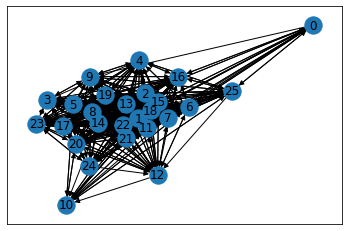

In [863]:
show_graph(np_adj_mat_norm)